# Вариант 15

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import datetime 
%matplotlib inline

### Функции реализующие умножение
Каждая функция возвращает время, затраченное на выполнение перемножения матриц

In [3]:
def multijk(A, B, C, n):
    start_time=datetime.datetime.now()
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [4]:
def multikj(A, B, C, n):
    start_time=datetime.datetime.now()
    for i in range(0, n):
        for k in range(0, n):
            for j in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [5]:
def multjik(A, B, C, n):
    start_time=datetime.datetime.now()
    for j in range(0, n):
        for i in range(0, n):
            for k in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [6]:
def multjki(A, B, C, n):
    start_time=datetime.datetime.now()
    for j in range(0, n):
        for k in range(0, n):
            for i in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [7]:
def multkij(A, B, C, n):
    start_time=datetime.datetime.now()
    for k in range(0, n):
        for i in range(0, n):
            for j in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

In [8]:
def multkji(A, B, C, n):
    start_time=datetime.datetime.now()
    for k in range(0, n):
        for j in range(0, n):
            for i in range(0, n):
                C[i, j]+=A[i, k]*B[k, j]
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    return res

### Массивы для хранения полученных значений времени

In [16]:
ijk=np.array([],dtype=np.float)
ikj=np.array([],dtype=np.float)
jik=np.array([],dtype=np.float)
jki=np.array([],dtype=np.float)
kij=np.array([],dtype=np.float)
kji=np.array([],dtype=np.float)
std=np.array([],dtype=np.float)

### Основной код

In [17]:
random.seed()
for n in range (100, 301, 10):
    A=random.rand(n, n)
    B=random.rand(n, n)
    C=np.zeros((n, n))
    
    ijk=np.append(ijk, multijk(A, B, C, n))
    
    C=np.zeros((n, n))
    ikj=np.append(ikj, multikj(A, B, C, n))
    
    C=np.zeros((n, n))
    jik=np.append(jik, multjik(A, B, C, n))
    
    C=np.zeros((n, n))
    jki=np.append(jki, multjki(A, B, C, n))
    
    C=np.zeros((n, n))
    kij=np.append(kij, multkij(A, B, C, n))
    
    C=np.zeros((n, n))
    kji=np.append(kji, multkji(A, B, C, n))
    
    C=np.zeros((n, n))
    start_time=datetime.datetime.now()
    C=A@B
    elapsed=datetime.datetime.now()-start_time
    res=elapsed.seconds*1000+elapsed.microseconds/1000
    std=np.append(std, res)

### Графики зависимостри времени от порядка матриц

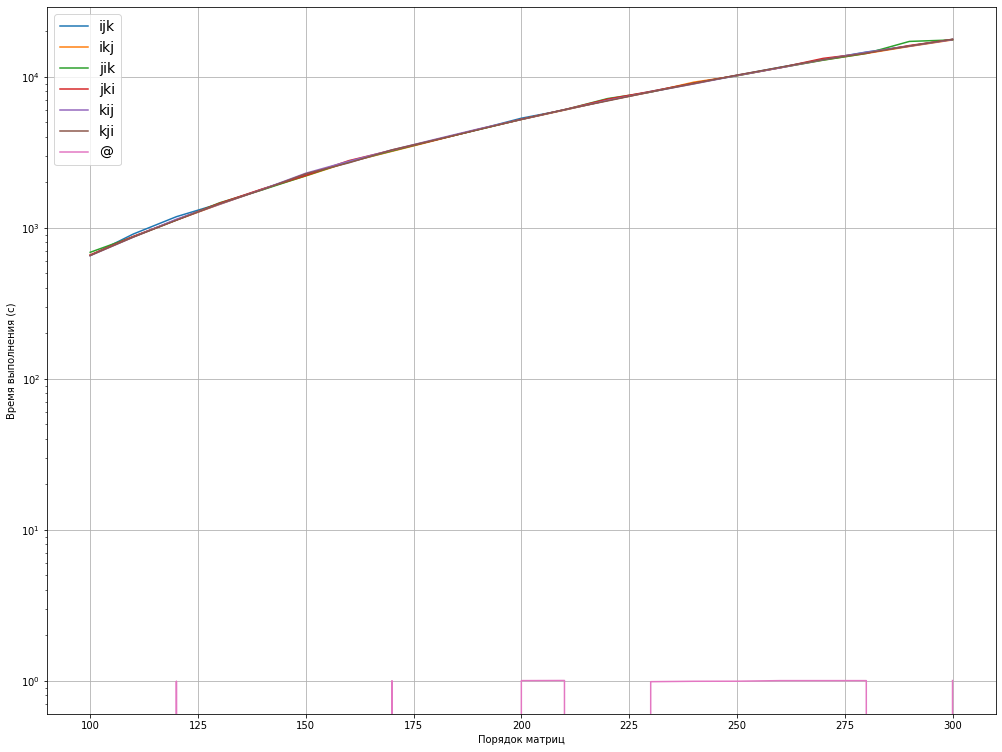

In [18]:
plt.figure(figsize = (17, 13))
plt.grid()
x=np.linspace(100, 300, 21)
plt.semilogy(x, ijk, label='ijk')
plt.semilogy(x, ikj, label='ikj')
plt.semilogy(x, jik, label='jik')
plt.semilogy(x, jki, label='jki')
plt.semilogy(x, kij, label='kij')
plt.semilogy(x, kji, label='kji')
plt.semilogy(x, std, label='@')
plt.xlabel('Порядок матриц')
plt.ylabel('Время выполнения (с)')
plt.legend(loc='best', fontsize=14)
pass

Как видно по графикам, различия во времени выполнения функций умножения матриц, реализованного с помощью 3 вложенных циклов в разном порядке пренебрежимо малы (их налиичие можно объяснить неидеальностью устройства, производящего вычисления, т.к. одни и те же операции с одними и теми же данными могут выполняться за разное время при разном времени начала выполнения). Отличие же от использования оператора '@' довольно значительное и это связано с различиями в алгоритмах и принципах выполнения операций. Пользовательские функции умножения выполняют все операции последовательно, сложность такого алгоритма - O(n^3), в то время как  алгоритмы NumPy разбивают операцию на подзадачи, которые могут выполняться параллельно, что позволяет значительно сократить время выполнения.